In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np

sns.set(style='whitegrid')
sns.set_palette("deep")
plt.rcParams["font.family"] = "Times New Roman"

default_colors = sns.color_palette()

column_names = ["rank", "n_nodes", "n_edges", "n_nodes_inner", "n_nodes_outer", "n_edges_inner", "n_edges_outer", "n_feat", "n_class", "swap_bits", "mem_peak", "mem_res"]

df = pd.read_csv("batch-mem-clean.csv", names=column_names)

print(df)

     rank  n_nodes   n_edges  n_nodes_inner  n_nodes_outer  n_edges_inner  \
0       3    27490    143905          21061          27490         126340   
1       7    35827    198141          20609          35827         125539   
2       0    33784    135226          21448          33784          93232   
3       6    47571    212122          21470          47571         109046   
4       2    31181    118551          20611          31181          93495   
..    ...      ...       ...            ...            ...            ...   
123     3   522651  20231218         315326         522651       17210426   
124     6   583632  14776286         297214         583632       10913960   
125     4   464954  13701627         297197         464954       12224203   
126     1   577523  21712390         312676         577523       17497092   
127     2   460561  14120526         299150         460561       12113402   

     n_edges_outer  n_feat  n_class  swap_bits     mem_peak      mem_res  


In [2]:
group_names = ["GCN-ogbn-arxiv", "GCN-ogbn-products", "GCN-yelp", "GCN-reddit",
               "GraphSAGE-ogbn-arxiv", "GraphSAGE-ogbn-products", "GraphSAGE-yelp", "GraphSAGE-reddit",
               "GAT-ogbn-arxiv", "GAT-yelp", "GAT-reddit", "GAT-ogbn-products",
               "GraphSAGE_lstm-ogbn-arxiv", "GraphSAGE_lstm-yelp", "GraphSAGE_lstm-reddit", "GraphSAGE_lstm-ogbn-products"]


df['group'] = df.index // 8
df['group'] = df['group'].map(lambda x: group_names[x % len(group_names)])


groups = df.groupby('group')


for name, group in groups:
    print(f'Group: {name}')
    print(group)
    print('\n')

Group: GAT-ogbn-arxiv
    rank  n_nodes  n_edges  n_nodes_inner  n_nodes_outer  n_edges_inner  \
64     1    25556    91581          20782          25556          81638   
65     0    33784   135226          21448          33784          93232   
66     2    31181   118551          20611          31181          93495   
67     7    35827   198141          20609          35827         125539   
68     4    57555   447834          21802          57555         215779   
69     6    47571   212122          21470          47571         109046   
70     3    27490   143905          21061          27490         126340   
71     5    43348   326555          21560          43348         152188   

    n_edges_outer  n_feat  n_class  swap_bits   mem_peak    mem_res  \
64          91581     128     40.0          0  343240704  419430400   
65         135226     128     40.0          0  402341888  446693376   
66         118551     128     40.0          0  385678848  452984832   
67         198141 

In [3]:
group_sums = groups[['mem_peak', 'mem_res']].sum()

for name, group in group_sums.iterrows():
    print(f'Group: {name}')
    print(f"Sum of 'mem_peak': {group['mem_peak']}")
    print(f"Sum of 'mem_res': {group['mem_res']}")
    print('\n')

Group: GAT-ogbn-arxiv
Sum of 'mem_peak': 3510541312
Sum of 'mem_res': 3898605568


Group: GAT-ogbn-products
Sum of 'mem_peak': 59627410944
Sum of 'mem_res': 64816676864


Group: GAT-reddit
Sum of 'mem_peak': 30047748608
Sum of 'mem_res': 32751222784


Group: GAT-yelp
Sum of 'mem_peak': 22926941696
Sum of 'mem_res': 24605884416


Group: GCN-ogbn-arxiv
Sum of 'mem_peak': 2181337600
Sum of 'mem_res': 2646605824


Group: GCN-ogbn-products
Sum of 'mem_peak': 36708846080
Sum of 'mem_res': 42867884032


Group: GCN-reddit
Sum of 'mem_peak': 17622733312
Sum of 'mem_res': 21611151360


Group: GCN-yelp
Sum of 'mem_peak': 12002094592
Sum of 'mem_res': 15634268160


Group: GraphSAGE-ogbn-arxiv
Sum of 'mem_peak': 2413499392
Sum of 'mem_res': 2906652672


Group: GraphSAGE-ogbn-products
Sum of 'mem_peak': 40715105280
Sum of 'mem_res': 45300580352


Group: GraphSAGE-reddit
Sum of 'mem_peak': 18098662912
Sum of 'mem_res': 22617784320


Group: GraphSAGE-yelp
Sum of 'mem_peak': 14071349760
Sum of 'mem_res

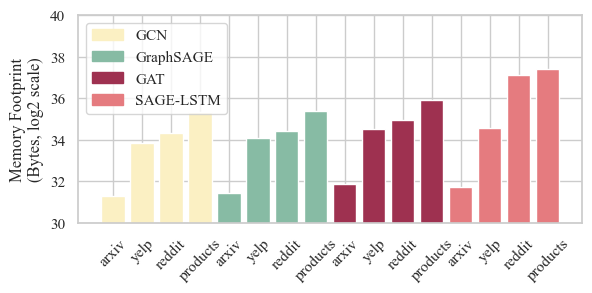

In [4]:
color_dict = {
    'GCN': (251/255, 240/255, 195/255.0),
    'GraphSAGE': (135/255.0, 187/255.0, 164/255.0),
    'GAT': (158/255.0, 49/255.0, 80/255.0),
    'GraphSAGE_lstm': (229/255.0, 123/255.0, 127/255.0)
}

new_order = ["GCN-ogbn-arxiv", "GCN-yelp", "GCN-reddit", "GCN-ogbn-products", 
             "GraphSAGE-ogbn-arxiv", "GraphSAGE-yelp", "GraphSAGE-reddit", "GraphSAGE-ogbn-products", 
             "GAT-ogbn-arxiv", "GAT-yelp", "GAT-reddit", "GAT-ogbn-products",
             "GraphSAGE_lstm-ogbn-arxiv", "GraphSAGE_lstm-yelp", "GraphSAGE_lstm-reddit", "GraphSAGE_lstm-ogbn-products"]

group_sums = group_sums.reindex(new_order)

group_names = group_sums.index
mem_res_sums = group_sums['mem_res'].values

new_labels = [name.split('-')[-1] if '-' in name else name for name in group_names]
colors_labels = [name.split('-')[0] if '-' in name else name for name in group_names]
colors = [color_dict[label] for label in colors_labels]

plt.figure(figsize=(6.5, 2.7), dpi=100)

plt.bar(group_names, np.log2(mem_res_sums), color=colors)

plt.ylabel('Memory Footprint\n(Bytes, log2 scale)')

GCN_patch = mpatches.Patch(color=color_dict['GCN'], label='GCN')
GraphSAGE_patch = mpatches.Patch(color=color_dict['GraphSAGE'], label='GraphSAGE')
GAT_patch = mpatches.Patch(color=color_dict['GAT'], label='GAT')
GraphSAGE_lstm_patch = mpatches.Patch(color=color_dict['GraphSAGE_lstm'], label='SAGE-LSTM')

plt.legend(handles=[GCN_patch, GraphSAGE_patch, GAT_patch, GraphSAGE_lstm_patch], loc='upper left')

plt.xticks(ticks=range(len(new_labels)), labels=new_labels, rotation=45)

plt.ylim(30,40)

plt.xticks(rotation=45)

plt.savefig("diff-model.pdf", dpi=400, format="pdf",
            bbox_inches='tight', pad_inches=0)